<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.Neural Network classificatuon with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be m)

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Nake 1000 samples
n_samples = 100

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(100, 100)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[-0.40957228 -0.70266396]
 [ 0.75810247  0.33360948]
 [-0.64086599  0.48813954]
 [ 0.78212694 -0.59114489]
 [ 0.77303687 -0.71826406]]
First 5 samples of y: 
[1 1 1 0 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0
5,0.215881,-0.930492,0
6,-0.916040,0.317596,0
7,-0.637408,-0.472662,1
8,0.323051,0.973140,0
9,0.976609,-0.025317,0


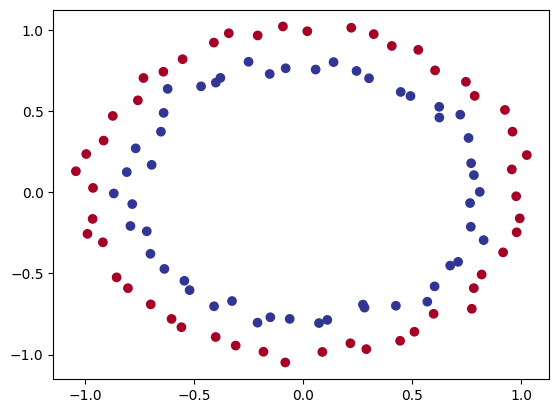

In [6]:
# Visualize, visualize, visualiza
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred as to a toy dataset, a dataset that is small enough to experiment but still sizeabke enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((100, 2), (100,))

In [8]:
X

array([[-0.40957228, -0.70266396],
       [ 0.75810247,  0.33360948],
       [-0.64086599,  0.48813954],
       [ 0.78212694, -0.59114489],
       [ 0.77303687, -0.71826406],
       [ 0.21588148, -0.93049176],
       [-0.91603993,  0.31759593],
       [-0.63740824, -0.47266177],
       [ 0.32305084,  0.97314019],
       [ 0.97660894, -0.02531689],
       [-0.64194001,  0.74154651],
       [-0.80450232, -0.59118789],
       [-0.69586068,  0.16819918],
       [-0.55928823, -0.83160963],
       [ 0.27339475, -0.69222843],
       [ 0.9249943 ,  0.50646567],
       [-0.78489998, -0.07336768],
       [-0.79317619, -0.20843689],
       [ 0.01831779,  0.9911613 ],
       [-0.70008939, -0.69083788],
       [ 0.62399231,  0.45943486],
       [ 0.07195491, -0.80609432],
       [-0.96661707, -0.16467296],
       [ 0.50971765, -0.85952722],
       [-0.62247342,  0.63594759],
       [-0.34190497,  0.97850305],
       [ 0.28903518, -0.96647014],
       [ 0.71008503, -0.42915845],
       [ 0.40589714,

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}\nSample target label: {y_sample}")

Sample input features: [-0.40957228 -0.70266396]
Sample target label: 1


### 1.2 Turn data into tensors and create traun and test splits

In [10]:
import torch
torch.__version__

'2.5.1+cu121'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.4096, -0.7027],
         [ 0.7581,  0.3336],
         [-0.6409,  0.4881],
         [ 0.7821, -0.5911],
         [ 0.7730, -0.7183]]),
 tensor([1., 1., 1., 0., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

## 2. Bulding a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnoistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Creat a training and test loop.

In [16]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[-0.7182, -0.2408],
        [-0.9960,  0.2350],
        [ 0.2890, -0.9665],
        [ 0.6045,  0.7500],
        [ 0.8273, -0.2954],
        [ 0.9250,  0.5065],
        [ 0.9930, -0.1612],
        [-0.6533,  0.3724],
        [ 0.9766, -0.0253],
        [ 0.4468,  0.6171],
        [-0.8045, -0.5912],
        [-0.9649,  0.0262],
        [ 0.7699,  0.1783],
        [ 0.4059,  0.9004],
        [-0.5217, -0.6033],
        [ 0.2159, -0.9305],
        [ 0.8182, -0.5072],
        [-0.4013,  0.6746],
        [ 0.7861,  0.5928],
        [-0.7849, -0.0734],
        [-0.0936,  1.0203],
        [ 0.5689, -0.6746],
        [-0.6374, -0.4727],
        [ 0.2440,  0.7463],
        [ 0.7101, -0.4292],
        [-0.7001, -0.6908],
        [-0.3271, -0.6705],
        [-0.3419,  0.9785],
        [ 0.7201,  0.4772],
        [-0.5593, -0.8316],
        [-0.6225,  0.6359],
        [ 0.7821, -0.5911],
        [-0.7932, -0.2084],
        [-0.3104, -0.9445],
        [ 0.3231,  0.9731],
        [ 0.6022, -0

Now we've setup device agnoistic code, let's build a model.
1. Subclasses 'nn.Module' (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.Linear()' layers that are capable of handling of handling the shapes of our data.
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device



In [18]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cpu'

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2776,  0.1697],
                      [-0.5804,  0.2366],
                      [ 0.1086,  0.2609],
                      [ 0.2072,  0.3425],
                      [ 0.5639, -0.6183]])),
             ('0.bias', tensor([ 0.6894, -0.6312,  0.1406,  0.5360, -0.0671])),
             ('1.weight',
              tensor([[ 0.2055, -0.3404,  0.3008,  0.3742, -0.3091]])),
             ('1.bias', tensor([-0.3458]))])

In [23]:
# Make predictions
# untrained_pred = model_0(X_test.to(device))
# print(f"Length of predictions: {len(untrained_pred)}")
# print(f"Shape of predictions: {untrained_pred.shape}")
# print(f"Length of test sample: {len(X_test)}")
# print(f"Shape of test sample: {X_test.shape}")
# print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
# print(f"\nFirst 10 labels:\n{y_test[:10]}")

# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 20, Shape: torch.Size([20, 1])
Length of test samples: 20, Shape: torch.Size([20, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [-0.]])

First 10 labels:
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])


In [24]:
X_test[:10], y_test[:10]

(tensor([[-0.8566, -0.5248],
         [ 0.0873, -0.9839],
         [-0.7014, -0.3797],
         [-0.7333,  0.7031],
         [-0.9902, -0.2568],
         [-0.4104,  0.9211],
         [-0.9666, -0.1647],
         [-0.0810,  0.7629],
         [-0.6419,  0.7415],
         [-0.4096, -0.7027]]),
 tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.
For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you want binary cross entropy or cross entropy
As a remider, the loss function measures how *wrong* your models predictions

And for optimizer, two of the most common

In [25]:
# Setup the loss function
#loss_fn = nn.BCELoss() # BCELoss

loss_fn = nn.BCEWithLogitsLoss() #BCEWithLoss = sigmoid activation
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.1)

In [26]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

## 3.Train model

To train our model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.
We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).
Then we can convert our model's predicton probalities to prediction labels by either rouding them or taking them

In [27]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0736],
        [-0.0554],
        [ 0.0070],
        [ 0.3822],
        [-0.0047]])

In [28]:
# Use the sigmoid activation function on our model logits tp turn them into predictions probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4816],
        [0.4861],
        [0.5018],
        [0.5944],
        [0.4988]])

In [29]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.]])

For our prediction probability values, we need to perform a range-style rounding on them:
* 'y_pred_prons' >= 0.5, 'y=1' (class 1)
* 'y_pred_probs' < 0.5 , 'y=0' (class 0)

In [30]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds
# In full
y_preds = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_preds
# Checl for equlity
print(torch.eq(y_preds, y_test))
# Get rid of extra dimension
y_preds.squeeze()

tensor([[ True,  True, False,  True,  True,  True,  True, False,  True, False,
          True,  True,  True,  True, False,  True, False,  True, False,  True],
        [ True,  True, False,  True,  True,  True,  True, False,  True, False,
          True,  True,  True,  True, False,  True, False,  True, False,  True],
        [False, False,  True, False, False, False, False,  True, False,  True,
         False, False, False, False,  True, False,  True, False,  True, False],
        [False, False,  True, False, False, False, False,  True, False,  True,
         False, False, False, False,  True, False,  True, False,  True, False],
        [ True,  True, False,  True,  True,  True,  True, False,  True, False,
          True,  True,  True,  True, False,  True, False,  True, False,  True],
        [False, False,  True, False, False, False, False,  True, False,  True,
         False, False, False, False,  True, False,  True, False,  True, False],
        [False, False,  True, False, False, Fa

tensor([0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1.], grad_fn=<SqueezeBackward0>)

# 3.2 Building a testing loop

In [31]:
device

'cpu'

In [32]:
!nvidia-sml

/bin/bash: line 1: nvidia-sml: command not found


In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1.Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3.Optimize the model
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval
  with torch.inference_mode():
    # 1.Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2.Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69620, Acc: 57.50% | Test loss: 0.76334, Test acc: 50.00%
Epoch: 10 | Loss: 0.69395, Acc: 56.25% | Test loss: 0.74933, Test acc: 45.00%
Epoch: 20 | Loss: 0.69295, Acc: 57.50% | Test loss: 0.74271, Test acc: 45.00%
Epoch: 30 | Loss: 0.69231, Acc: 57.50% | Test loss: 0.73951, Test acc: 45.00%
Epoch: 40 | Loss: 0.69182, Acc: 57.50% | Test loss: 0.73796, Test acc: 45.00%
Epoch: 50 | Loss: 0.69140, Acc: 56.25% | Test loss: 0.73724, Test acc: 45.00%
Epoch: 60 | Loss: 0.69104, Acc: 56.25% | Test loss: 0.73695, Test acc: 40.00%
Epoch: 70 | Loss: 0.69073, Acc: 56.25% | Test loss: 0.73687, Test acc: 40.00%
Epoch: 80 | Loss: 0.69046, Acc: 57.50% | Test loss: 0.73691, Test acc: 40.00%
Epoch: 90 | Loss: 0.69021, Acc: 60.00% | Test loss: 0.73702, Test acc: 40.00%


In [34]:
circles.label.value_counts()

,count
label,
1,50
0,50


## 4. Make predictions and evaluate the model
From the matrics it look our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!
In other words, 'Visualize, visualize, visualize!'
To do so, we're going to import a function called *plot_decision_boundary()* -


In [35]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

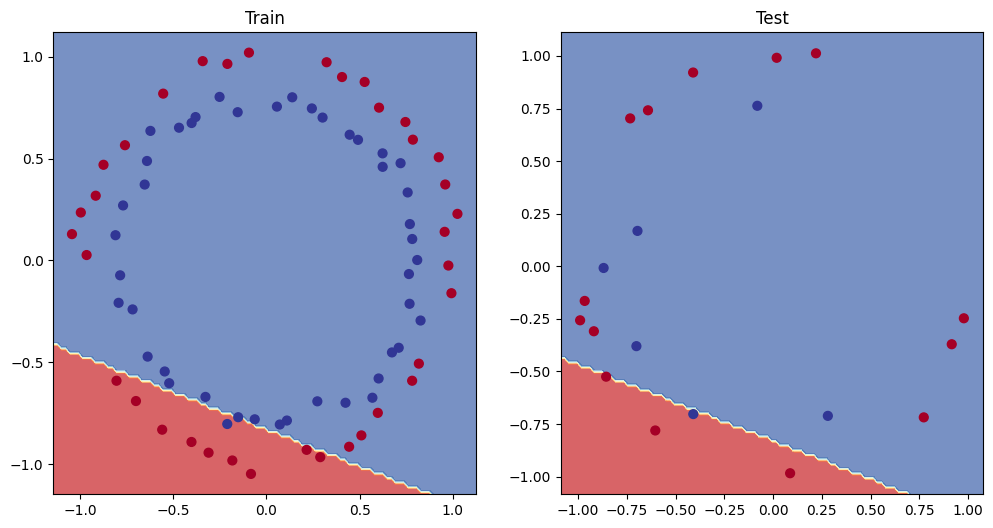

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for layer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These option are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameter**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [37]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2490,  0.1353],
                      [-0.5249,  0.3033],
                      [ 0.0616,  0.2045],
                      [ 0.1506,  0.2744],
                      [ 0.6161, -0.5556]])),
             ('0.bias', tensor([ 0.6913, -0.6363,  0.1444,  0.5404, -0.0720])),
             ('1.weight',
              tensor([[ 0.1394, -0.3114,  0.2394,  0.2873, -0.2900]])),
             ('1.bias', tensor([-0.3283]))])

In [55]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def foward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self,layer_1(x)))  # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
X_train[:5], y_train[:5]


(tensor([[-0.7182, -0.2408],
         [-0.9960,  0.2350],
         [ 0.2890, -0.9665],
         [ 0.6045,  0.7500],
         [ 0.8273, -0.2954]]),
 tensor([1., 0., 0., 0., 1.]))

In [45]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2490,  0.1353],
                      [-0.5249,  0.3033],
                      [ 0.0616,  0.2045],
                      [ 0.1506,  0.2744],
                      [ 0.6161, -0.5556]])),
             ('0.bias', tensor([ 0.6913, -0.6363,  0.1444,  0.5404, -0.0720])),
             ('1.weight',
              tensor([[ 0.1394, -0.3114,  0.2394,  0.2873, -0.2900]])),
             ('1.bias', tensor([-0.3283]))])

In [56]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2435, -0.3386],
                      [-0.5755,  0.5929],
                      [-0.2830,  0.1874],
                      [-0.2453,  0.0575],
                      [ 0.6592,  0.3258],
                      [-0.6128,  0.2807],
                      [ 0.6712,  0.1860],
                      [ 0.4741,  0.6971],
                      [-0.1083,  0.1468],
                      [-0.4915, -0.1457]])),
             ('layer_1.bias',
              tensor([ 0.5237,  0.3625, -0.4474, -0.5670, -0.4832, -0.6978, -0.5456, -0.1749,
                       0.4772,  0.1184])),
             ('layer_2.weight',
              tensor([[-0.2405, -0.2537,  0.1573, -0.2352, -0.0389,  0.1517, -0.1464, -0.0345,
                       -0.0275, -0.0748],
                      [-0.1603, -0.2819, -0.2556, -0.1693,  0.3054, -0.1527, -0.2124,  0.0767,
                        0.0872,  0.1733],
                      [ 0.2404,  0.1761, -0.3135,  0.0280,  0.1916, -0.0

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> pred probabilities -> predict

  # 2.Calculate the loss/acc
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true= y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
